In [1]:
# 分组：关注数据样本内部，不同分组数据的表现差异

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 获取数据
df = pd.read_excel('order2019.xlsx')

In [4]:
# 3.5.1 散点簇形图：颜色区分

In [5]:
a_x = np.random.random(100) + 1
a_y = np.random.random(100) + 1.5
b_x = np.random.random(200) + 2.1
b_y = np.random.random(200) + 1.7

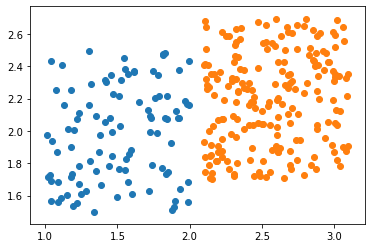

In [6]:
plt.scatter(a_x,a_y)
plt.scatter(b_x,b_y)

In [7]:
# 3.5.2 分组条形图：1、颜色区分 2、引流渠道vs支付渠道

In [8]:
x = ['a','b','c','d']
axis1 = [1,2,3,4]
axis2 = [1.2,2.2,3.2,4.2]
y1 = [1,2,3,4]
y2 = [2,3,4,1]

<BarContainer object of 4 artists>

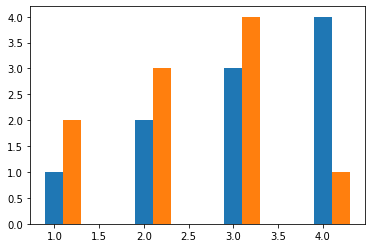

In [9]:
plt.bar(axis1,y1,width=0.2)
plt.bar(axis2,y2,width=0.2)

In [10]:
# 订单数据：渠道、支付平台、支付金额
chanels = df['chanelID'].unique().tolist()[:3]

In [11]:
df2 = df[(df['chanelID']==chanels[0]) | (df['chanelID']==chanels[1]) 
         | (df['chanelID']==chanels[2])]

In [12]:
df2 = df2[['chanelID','platfromType','payment']]
df2

,chanelID,platfromType,payment
0,渠道-0396,APP,272.51
1,渠道-0765,Wech atMP,337.93
2,渠道-0530,We c hatMP,891.23
3,渠道-0530,WEB,688.88
5,渠道-0765,Wech atMP,425.20
...,...,...,...
104539,渠道-0396,Wech atMP,1620.03
104541,渠道-0396,APP,877.29
104543,渠道-0530,APP,85.27
104545,渠道-0530,APP,127.23


In [15]:
res = df2.groupby(['chanelID','platfromType']).sum()
res

payment
chanelID platfromType              
渠道-0396  AL i MP       2.094863e+04
         ALiM P        1.350152e+05
         AP P          6.770314e+05
         APP           3.822016e+06
         WE B          7.600349e+04
         WEB           6.028438e+05
         Wap           1.203890e+03
         We c hatMP    5.566079e+05
         Wech atMP     3.834436e+06
         Wech atShop   1.211701e+04
渠道-0530  AL i MP       4.186280e+04
         ALiM P        1.916733e+05
         AP P          8.756512e+05
         APP           5.581815e+06
         WE B          9.807031e+04
         WEB           8.537743e+05
         We c hatMP    8.070950e+05
         We c hatShop  7.558300e+02
         Wech atMP     6.040621e+06
         Wech atShop   2.030326e+04
渠道-0765  AL i MP       2.842479e+04
         ALiM P        1.778161e+05
         AP P          6.367093e+05
         APP           4.420494e+06
         WE B          8.613528e+04
         WEB           6.129048e+05
         We c hatMP    7.838473e+05
         Wech atMP     4.372428e+06
         Wech atShop   4.921460e+03

[Text(0, 0, 'AL i MP'),
 Text(0, 0, 'ALiM P'),
 Text(0, 0, 'AP P '),
 Text(0, 0, 'APP '),
 Text(0, 0, 'WE B '),
 Text(0, 0, 'WEB '),
 Text(0, 0, 'Wap  ')]

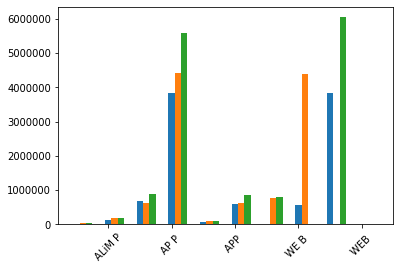

In [30]:
# 创建子图
fig, ax = plt.subplots()

# x轴分组位置设置
labels1 = res.loc[chanels[0],:].index.tolist()
labels2 = res.loc[chanels[1],:].index.tolist()
labels3 = res.loc[chanels[2],:].index.tolist()
size = len(labels)
plt.bar(np.arange(size)+1, res.loc[chanels[0],'payment'].tolist(), width=0.2)
plt.bar(np.arange(len(labels2))+1.2, res.loc[chanels[1],'payment'].tolist(), width=0.2)
plt.bar(np.arange(len(labels3))+1.4, res.loc[chanels[2],'payment'].tolist(), width=0.2)

# x轴类别数据
ax.set_xticklabels(labels=labels1,rotation=45)

In [20]:
res.loc[chanels[0],'payment'].tolist()

[20948.63,
 135015.22435081718,
 677031.3500889939,
 3822016.217413017,
 76003.48999999999,
 602843.8209788937,
 1203.89,
 556607.8809662746,
 3834435.6860787817,
 12117.01]